In [1]:
!pip install fastbook

     |████████████████████████████████| 727kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.6MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 194kB 10.7MB/s 
     |████████████████████████████████| 1.0MB 13.9MB/s 
     |████████████████████████████████| 40kB 6.5MB/s 
     |████████████████████████████████| 40kB 7.2MB/s 
     |████████████████████████████████| 92kB 10.4MB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 2.6MB 21.1MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
root_dir = '/content'

In [3]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
path = Path(root_dir + '/whatsapp')
classes = ['scanned', 'wishes']
for folder in classes:
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)

In [6]:
for folder in classes:
  dest = path/folder
  file_name = str(folder) + ".txt"
  download_images(url_file=dest/file_name, dest=dest, max_pics=200)

In [7]:
fns = get_image_files(path)

In [8]:
fns[:5]

(#5) [Path('/content/whatsapp/scanned/00000147.jpg'),Path('/content/whatsapp/scanned/00000135.jpg'),Path('/content/whatsapp/scanned/00000046.jpg'),Path('/content/whatsapp/scanned/00000149.jpg'),Path('/content/whatsapp/scanned/00000057.jpg')]

In [9]:
failed = verify_images(fns)

In [10]:
failed.map(Path.unlink)

(#0) []

In [11]:
whatsapp = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     get_y=parent_label,
                     splitter=RandomSplitter(valid_pct=0.2, seed=42),
                     item_tfms= Resize(128))

In [13]:
dls =  whatsapp.dataloaders(path)

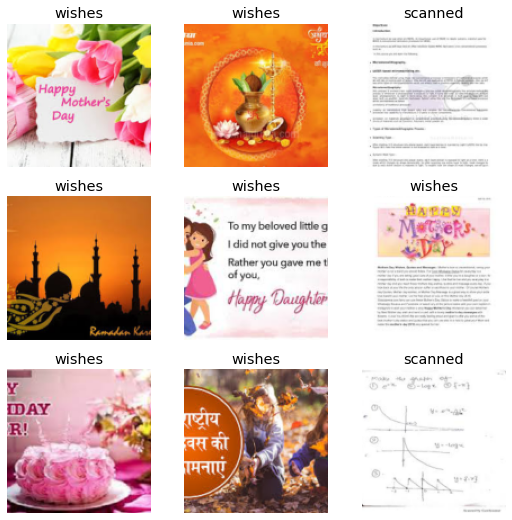

In [14]:
dls.valid.show_batch()

In [15]:
whatsapp = whatsapp.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

In [16]:
dls = whatsapp.dataloaders(path)

In [17]:
learn = cnn_learner(dls, resnet18,metrics=error_rate )
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.948247,0.533795,0.203125,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.210696,0.289109,0.078125,00:01
1,0.179150,0.301294,0.078125,00:01
2,0.159717,0.255702,0.062500,00:01
3,0.149863,0.221580,0.078125,00:01


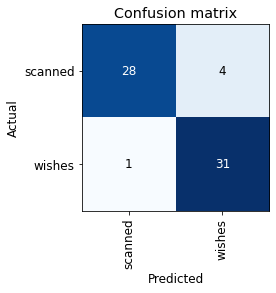

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

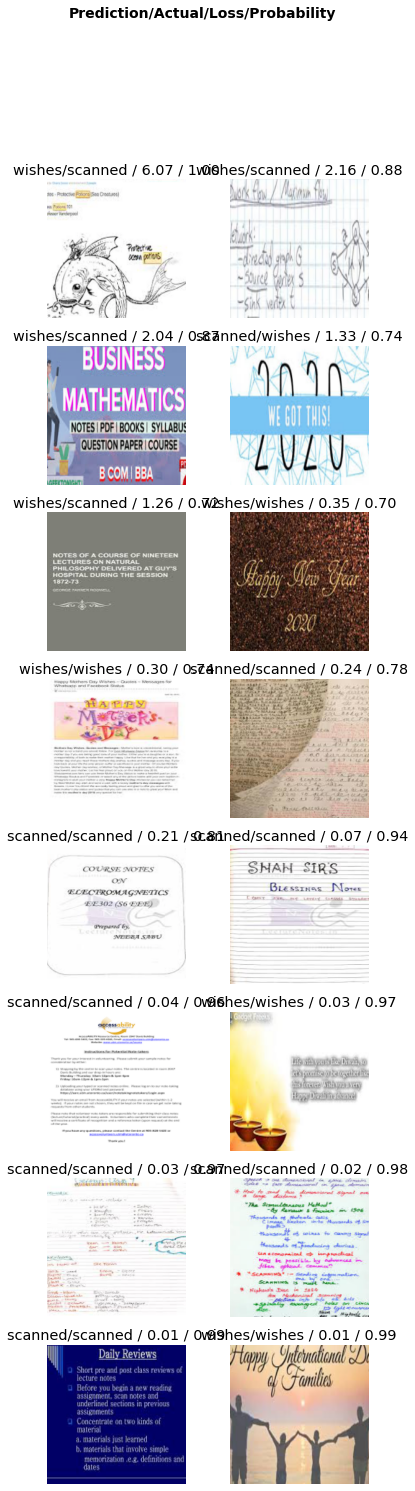

In [19]:
interp.plot_top_losses(16, nrows=8)

In [20]:
cleaner = ImageClassifierCleaner(learn)

In [21]:
cleaner

In [22]:
learn.export()

In [23]:
learn.predict("/content/whatsapp/scanned/00000147.jpg")

('scanned', tensor(0), tensor([9.9992e-01, 8.0994e-05]))

In [24]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [25]:
img =   PILImage.create(btn_upload.data[-1])

In [26]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [28]:
pred, pred_idx, probs = learn.predict(img)

In [29]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: wishes; Probability: 1.0000')

In [30]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [31]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(128,128))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
  #print(lbl_pred)

btn_run.on_click(on_click_classify)

In [32]:
btn_upload =widgets.FileUpload()

In [33]:
VBox([widgets.Label('Select your photo!'), 
       btn_upload, btn_run, out_pl, lbl_pred])